In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

# 7.1 Hypothesis Tests and Confidence Intervals for a Single Coefficient

In [2]:
# load the `CASchools` dataset
CASchools=pd.read_csv('CASchools.csv')

# add student-teacher ratio
CASchools['STR'] = CASchools['students']/CASchools['teachers']

# add average test-score
CASchools['score'] = (CASchools['read'] + CASchools['math'])/2

In [3]:
model = smf.ols('score ~ STR+english', data = CASchools).fit(cov_type='HC1')
model.summary().tables[1]


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,686.0322,8.728,78.599,0.000,668.925,703.139
STR,-1.1013,0.433,-2.544,0.011,-1.950,-0.253
english,-0.6498,0.031,-20.939,0.000,-0.711,-0.589


In [4]:
# compute two-sided p-value

2*t.sf(abs(model.tvalues[1]),model.df_resid)

0.01130920812339392

# 7.2 An Application to Test Scores and the Student-Teacher Ratio

In [5]:
model = smf.ols('score ~ STR+english', data = CASchools).fit()
model.conf_int()

,0,1
Intercept,671.464058,700.600431
STR,-1.848797,-0.353794
english,-0.727111,-0.572442


In [6]:
model.conf_int(0.1)

,0,1
Intercept,673.814579,698.249910
STR,-1.728190,-0.474401
english,-0.714634,-0.584920


In [7]:
# compute robust standard errors
model = smf.ols('score ~ STR+english', data = CASchools).fit(cov_type='HC1')

# compute robust 95% confidence intervals
model.conf_int()

,0,1
Intercept,668.925239,703.139250
STR,-1.949661,-0.252931
english,-0.710598,-0.588956


In [8]:
# compute robust 90% confidence intervals
model.conf_int(0.1)

,0,1
Intercept,671.675593,700.388896
STR,-1.813266,-0.389325
english,-0.700820,-0.598734


## Another Augmentation of the Model

In [9]:
# scale expenditure to thousands of dollars
CASchools['expenditure'] = CASchools['expenditure']/1000

# estimate the model
model = smf.ols('score ~ STR+english+expenditure', data = CASchools).fit(cov_type='HC1')
model.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,649.5779,15.458,42.021,0.000,619.280,679.876
STR,-0.2864,0.482,-0.594,0.552,-1.231,0.658
english,-0.6560,0.032,-20.640,0.000,-0.718,-0.594
expenditure,3.8679,1.581,2.447,0.014,0.770,6.966


In [10]:
# compute the sample correlation between 'size' and 'expenditure'
np.corrcoef(CASchools['STR'],CASchools['expenditure'])

array([[ 1.        , -0.61998216],
       [-0.61998216,  1.        ]])

# 7.3 Joint Hypothesis Testing Using the F-Statistic

In [11]:
# estimate the multiple regression model
y=CASchools['score']
X=CASchools[['STR','english','expenditure']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# execute the function on the model object and provide both linear restrictions to be tested as strings
model.f_test("STR=0, expenditure=0")


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=8.010125441768466, p=0.000385974822500106, df_denom=416, df_num=2>

In [12]:
# heteroskedasticity-robust F-test
model = sm.OLS(y, X).fit(cov_type='HC1')
model.f_test("STR=0, expenditure=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=5.433724737168237, p=0.004682314893890339, df_denom=416, df_num=2>

# 7.4 Confidence Sets for Multiple Coefficients

In [13]:
# draw the 95% confidence set for coefficients on size and expenditure
#Estimate the model
model = sm.OLS(y, X).fit()

#Compute the covariance matrix of the regression coefficients of interest
cov = model.cov_params().iloc[[1, 3], [1, 3]]
#Get standard errors of the regression coefficients and Set t-value for 95%
se = model.bse[[1,3]]
t1 = 1.96


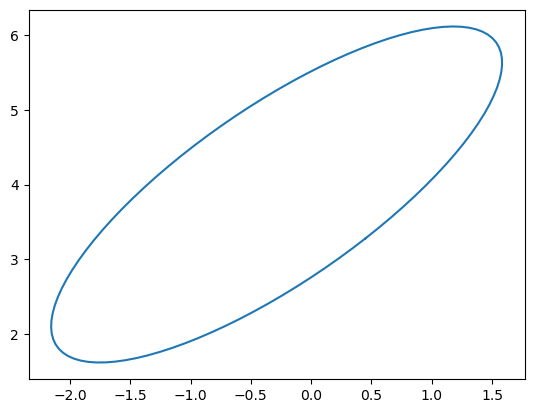

In [17]:
#Create an ellipse using the covariance matrix and confidence intervals.
theta = np.linspace(0, 2*np.pi, 100)
a = t1 * se[0] * np.cos(theta)
b = t1 * se[1] * np.sin(theta)
ellipse = np.array([a, b])
angle = np.arctan2(cov.iloc[0,1], cov.iloc[1,1]) * 180 / np.pi
R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
ellipse = np.dot(R, ellipse)
x1 = model.params[1] + ellipse[0,:]
y1 = model.params[3] + ellipse[1,:]
plt.plot(x1, y1);


# 7.5 Model Specification for Multiple Regression

In [20]:
# estimate the model and print the summary to console
model = smf.ols('score ~ STR + english + lunch', data = CASchools).fit(cov_type='HC1')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     453.5
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          1.05e-130
Time:                        13:40:11   Log-Likelihood:                -1520.5
No. Observations:                 420   AIC:                             3049.
Df Residuals:                     416   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.1500      5.568    125.735      0.000     689.236     711.064
STR           -0.9983      0.270     -3.696      0.000      -1.528      -0.469
english       -0.1216      0.033     -3.703      0.000      -0.186      -0.057
lunch         -0.5473      0.024    -22.705      0.000      -0.595      -0.500
==============================================================================
Omnibus:                        6.998   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.626
Skew:                          -0.024   Prob(JB):                      0.00493
Kurtosis:                       3.778   Cond. No.                         621.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

## Model Specification in Theory and in Practice

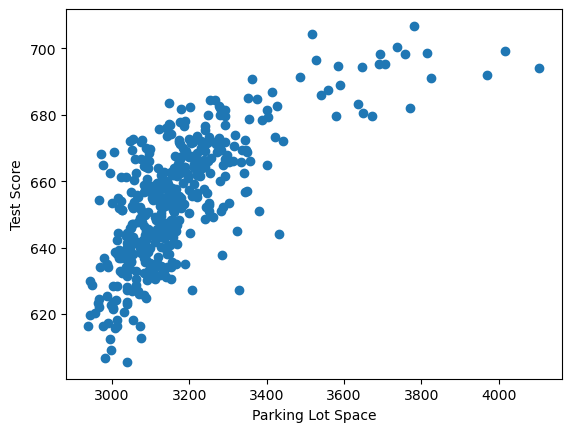

In [37]:
# set seed for reproducibility
np.random.seed(1)

# generate observations for parking lot space
CASchools['PLS'] = 22*CASchools['income' ]- 15*CASchools['STR']+0.2*CASchools['expenditure']+np.random.normal(scale = 80) + 3000

# plot parking lot space against test score
plt.scatter(CASchools['PLS'],CASchools['score'])
plt.xlabel('Parking Lot Space')
plt.ylabel('Test Score');

In [38]:
# regress test score on PLS

smf.ols('score ~ PLS', data = CASchools).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     432.1
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.99e-66
Time:                        13:51:28   Log-Likelihood:                -1684.2
No. Observations:                 420   AIC:                             3372.
Df Residuals:                     418   BIC:                             3381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    397.4002     12.368     32.130      0.000     373.088     421.712
PLS            0.0809      0.004     20.788      0.000       0.073       0.089
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.660
Skew:                          -0.150   Prob(JB):                        0.265
Kurtosis:                       2.751   Cond. No.                     6.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 7.6 Analysis of the Test Score Data Set

In [41]:
# estimate the correlation between 'calworks' and 'lunch'
np.corrcoef(CASchools['calworks'], CASchools['lunch'])

array([[1.       , 0.7394218],
       [0.7394218, 1.       ]])

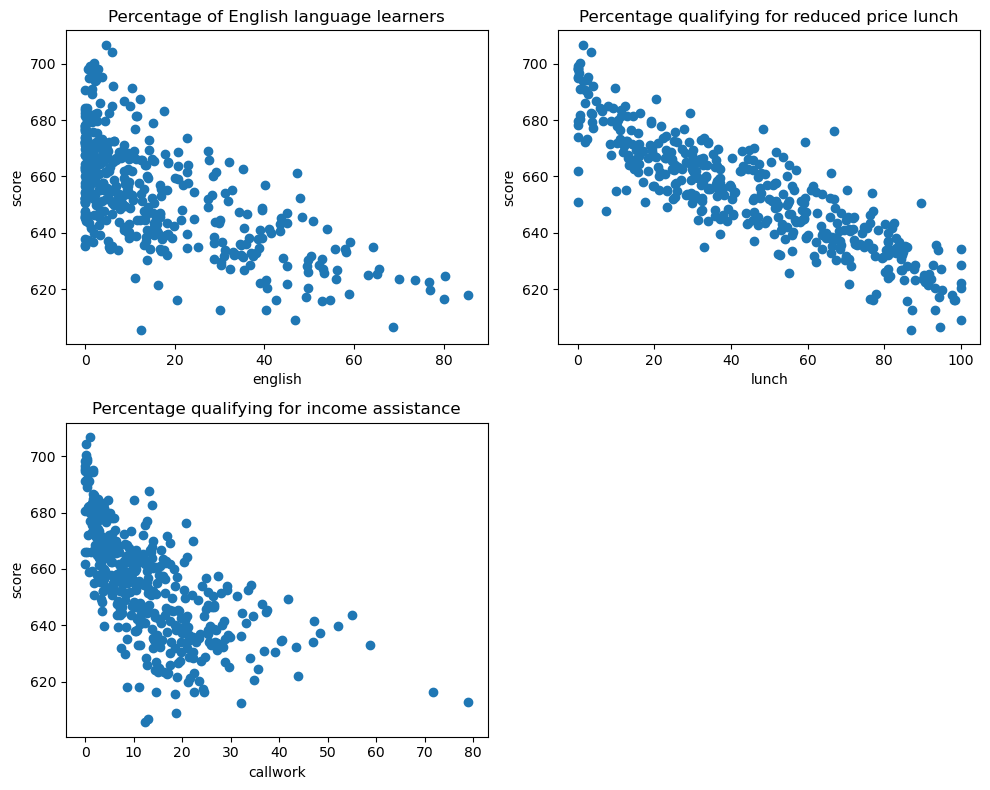

In [69]:
# set up arrangement of plots

fig, ax=plt.subplots(2,2, figsize=(10,8))

ax[0,0].scatter(CASchools['english'],CASchools['score'])
ax[0,0].title.set_text("Percentage of English language learners")
ax[0,0].set_xlabel('english')
ax[0,0].set_ylabel('score')
ax[0,1].scatter(CASchools['lunch'],CASchools['score'])
ax[0,1].title.set_text("Percentage qualifying for reduced price lunch")
ax[0,1].set_xlabel('lunch')
ax[0,1].set_ylabel('score')
ax[1,0].scatter(CASchools['calworks'],CASchools['score'])
ax[1,0].title.set_text("Percentage qualifying for income assistance")
ax[1,0].set_xlabel('callwork')
ax[1,0].set_ylabel('score')
fig.delaxes(ax[1,1])
plt.tight_layout();

In [71]:
# estimate correlation between student characteristics and test scores
print(np.corrcoef(CASchools['score'], CASchools['english']))
print(np.corrcoef(CASchools['score'], CASchools['lunch']))
print(np.corrcoef(CASchools['score'], CASchools['calworks']))

[[ 1.         -0.64412381]
 [-0.64412381  1.        ]]
[[ 1.         -0.86877199]
 [-0.86877199  1.        ]]
[[ 1.         -0.62685332]
 [-0.62685332  1.        ]]


In [72]:
# estimate different model specifications
spec1 = smf.ols('score ~ STR', data = CASchools).fit(cov_type='HC1')
spec2 = smf.ols('score ~ STR + english', data = CASchools).fit(cov_type='HC1')
spec3 = smf.ols('score ~ STR + english + lunch', data = CASchools).fit(cov_type='HC1')
spec4 = smf.ols('score ~ STR + english + calworks', data = CASchools).fit(cov_type='HC1')
spec5 = smf.ols('score ~ STR + english + lunch + calworks', data = CASchools).fit(cov_type='HC1')

In [82]:
Stargazer([spec1, spec2,spec3, spec4, spec5])

## Note:
-Confidence set code is wrong